<a href="https://colab.research.google.com/github/ArnoldoOliva/DatosMasivos/blob/main/Codigo_Final_DEEPL_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
pd.set_option("display.max_columns",None)

In [ ]:
main_dir  = "C:/Users/52269198/OneDrive - Conduent/Documents/tarea/Landscape Classification/"

**Training data**

In [ ]:
IMG_SIZE = (224, 224)
CLASS_LABELS = ["Coast", "Desert", "Forest", "Glacier", "Mountain"]

#TF_RANDOM_SEED = 42

def parse_directory(directory, category):
    data = []
    # Loop through each item in the directory
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)

        # Check if the item is a subdirectory
        if os.path.isdir(item_path):
            data.extend(parse_directory(item_path, category))  # Recursively call the function for subdirectories

        # Check if the item is an image
        elif item.endswith('.jpg') or item.endswith('.png') or item.endswith(".jpeg"):
            # Read the image using OpenCV
            image = cv2.imread(item_path)

            # Resize the image to IMG_SIZE using OpenCV
            img = cv2.resize(image,IMG_SIZE)  #guardarla en otro folder y volverlo a leer
            #img /= 255
            #pillow

            # Append the image data and category label to the list
            data.append((img, int(category) if category.isdigit() else category))
    return data

In [ ]:
traindir=main_dir+"Training Data"

In [ ]:
# Call the recursive function to parse the main directory
traindata=[]
for category_folder in os.listdir(traindir):
    category_path = os.path.join(traindir, category_folder)

    if os.path.isdir(category_path):
        data1=parse_directory(category_path, category_folder)
        traindata.extend(data1)

# You now have all the image data and category labels stored in the "data" list

In [ ]:
len(traindata)

10000

In [ ]:
print(len(traindata[0]))
print(len(traindata[0][0]))
traindata[0]

2
224


(array([[[197, 149,   0],
         [193, 146,   0],
         [188, 141,   0],
         ...,
         [231, 220, 207],
         [233, 219, 207],
         [233, 219, 207]],
 
        [[197, 151,   1],
         [194, 148,   2],
         [191, 145,   3],
         ...,
         [232, 220, 207],
         [233, 219, 207],
         [233, 219, 207]],
 
        [[197, 152,   8],
         [197, 152,  11],
         [196, 150,  14],
         ...,
         [232, 219, 206],
         [232, 218, 206],
         [232, 218, 206]],
 
        ...,
 
        [[195, 200, 209],
         [191, 196, 204],
         [192, 197, 206],
         ...,
         [167, 157, 143],
         [140, 128, 112],
         [167, 155, 139]],
 
        [[194, 199, 208],
         [192, 197, 206],
         [191, 196, 205],
         ...,
         [185, 176, 163],
         [131, 122, 109],
         [163, 154, 141]],
 
        [[193, 198, 207],
         [193, 198, 207],
         [190, 195, 204],
         ...,
         [176, 167, 155],
  

**Validation data**

In [ ]:
validationf="C:/Users/52269198/OneDrive - Conduent/Documents/tarea/Landscape Classification/Validation Data/"
validationdata=[]
# Call the recursive function to parse the main directory
for category_folder in os.listdir(validationf):
    category_path = os.path.join(validationf, category_folder)

    if os.path.isdir(category_path):
        data2=parse_directory(category_path, category_folder)
        validationdata.extend(data2)

In [ ]:
print(len(validationdata))

1500


**Test data**

In [ ]:
testf="C:/Users/52269198/OneDrive - Conduent/Documents/tarea/Landscape Classification/Testing Data/"

testdata=[]
# Call the recursive function to parse the main directory
for category_folder in os.listdir(testf):
    category_path = os.path.join(testf, category_folder)

    if os.path.isdir(category_path):
        data3=parse_directory(category_path, category_folder)
        testdata.extend(data3)

In [ ]:
print(len(testdata))

500


# Model

In [ ]:
num_classes = 5

# Function to preprocess the image data and labels
def preprocess_data(data):
    images = []
    labels = []
    for e in data:
        # Perform any necessary preprocessing steps on the image
        # For example, you can resize the image or normalize pixel values

        # Append the preprocessed image and label to the lists
        images.append(e[0])
        labels.append(e[1])
    return np.array(images), np.array(labels)

# Preprocess the train, validation, and test data
X_train, y_train = preprocess_data(traindata)
X_val, y_val = preprocess_data(validationdata)
X_test, y_test = preprocess_data(testdata)

#Normalize
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /=255
X_val /= 255
X_test /= 255

In [ ]:
label_map = {
    1:"Coast",
    2:"Desert",
    3:"Forest",
    4:"Glacier",
    5:"Mountain"
}

In [ ]:
mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

# Use np.where() to perform the conversion based on the mapping dictionary
y_train2 = np.where(y_train <= max(mapping), y_train - 1, y_train)
y_val2 = np.where(y_val <= max(mapping), y_val - 1, y_val)
y_test2 = np.where(y_test <= max(mapping), y_test - 1, y_test)

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train2 = to_categorical(y_train2, num_classes)
y_val2 = to_categorical(y_val2, num_classes)
y_test2 = to_categorical(y_test2, num_classes)


In [ ]:
unique_elements, counts = np.unique(y_train, return_counts=True)
value_counts = dict(zip(unique_elements, counts))
print(value_counts)
#2000 de cada categoria en training

{1: 2000, 2: 2000, 3: 2000, 4: 2000, 5: 2000}


In [ ]:
unique_elements, counts = np.unique(y_val, return_counts=True)
value_counts = dict(zip(unique_elements, counts))
print(value_counts)
#300 de cada categoria en validation

{1: 300, 2: 300, 3: 300, 4: 300, 5: 300}


In [ ]:
unique_elements, counts = np.unique(y_test, return_counts=True)
value_counts = dict(zip(unique_elements, counts))
print(value_counts)
#100 de cada categoria en testing

{1: 100, 2: 100, 3: 100, 4: 100, 5: 100}


In [ ]:
from joblib import Parallel, delayed

In [ ]:
import tensorflow as tf
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

# Initialize the distribution strategy
strategy = tf.distribute.MirroredStrategy()

# Build the VGG16 model inside the scope of the strategy
with strategy.scope():
    vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Add a Global Average Pooling layer to reduce spatial dimensions
    x = GlobalAveragePooling2D()(vgg_model.output)
    feature_extractor = Model(inputs=vgg_model.input, outputs=x)

# Function to extract features from input data using the feature_extractor
def extract_features(model, input_data):
    return model.predict(input_data)

# Extract features from X_train, X_val, and X_test in parallel
features_train = extract_features(feature_extractor, X_train)
features_val = extract_features(feature_extractor, X_val)
features_test = extract_features(feature_extractor, X_test)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
16/16 [==============================] - 93s 6s/step


In [ ]:
y_train2=y_train2.astype(int)
y_val2=y_val2.astype(int)
y_test2=y_test2.astype(int)

In [ ]:
y_train_indices = np.argmax(y_train2, axis=1)
y_val_indices = np.argmax(y_val2, axis=1)
y_test_indices = np.argmax(y_test2, axis=1)

In [ ]:
# Print shapes for debugging
print("Shape of features_train:", features_train.shape)
print("Shape of features_val:", features_val.shape)
print("Shape of features_test:", features_test.shape)
print("Shape of y_train2:", y_train2.shape)
print("Shape of y_val2:", y_val2.shape)
print("Shape of y_test2:", y_test2.shape)
print("Number of output nodes (num_classes):", num_classes)
#512 neuronas resultantes

Shape of features_train: (10000, 512)
Shape of features_val: (1500, 512)
Shape of features_test: (500, 512)
Shape of y_train2: (10000, 5)
Shape of y_val2: (1500, 5)
Shape of y_test2: (500, 5)
Number of output nodes (num_classes): 5


In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense
from keras.regularizers import l2
EPOCHS=10
BATCH_SIZE = 32
# Build your custom classifier model with L2 regularization
model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(features_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))

# Function to train the model
def train_model(model, callbacks=[]):
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model.fit(features_train, y_train_indices,
                     epochs=EPOCHS,
                     batch_size=BATCH_SIZE,
                     steps_per_epoch=len(features_train) // BATCH_SIZE,
                     validation_data=(features_val, y_val_indices),
                     validation_steps=len(features_val) // BATCH_SIZE,
                     callbacks=callbacks
                    )

# Train the model using the extracted features and the train_model function
model1 = train_model(model)

# Evaluate the model on the test data using the extracted features
loss, accuracy = model.evaluate(features_test, y_test_indices)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
312/312 [==============================] - 16s 35ms/step - loss: 0.9442 - accuracy: 0.6904 - val_loss: 1.2070 - val_accuracy: 0.5442
Epoch 2/10
312/312 [==============================] - 10s 33ms/step - loss: 0.7350 - accuracy: 0.7659 - val_loss: 0.8911 - val_accuracy: 0.7018
Epoch 3/10
312/312 [==============================] - 10s 33ms/step - loss: 0.6687 - accuracy: 0.7837 - val_loss: 0.9446 - val_accuracy: 0.6739
Epoch 4/10
312/312 [==============================] - 11s 34ms/step - loss: 0.6323 - accuracy: 0.7970 - val_loss: 0.8736 - val_accuracy: 0.7194
Epoch 5/10
312/312 [==============================] - 11s 34ms/step - loss: 0.6030 - accuracy: 0.8069 - val_loss: 0.8446 - val_accuracy: 0.7330
Epoch 6/10
312/312 [==============================] - 11s 34ms/step - loss: 0.5677 - accuracy: 0.8138 - val_loss: 0.9660 - val_accuracy: 0.6943
Epoch 7/10
312/312 [==============================] - 11s 34ms/step - loss: 0.5404 - accuracy: 0.8241 - val_loss: 0.8971 - val_accuracy:

In [ ]:
predicted_probabilities = model.predict(features_test)

# Find the class with the highest probability for each data point
predicted_indices = np.argmax(predicted_probabilities, axis=1)
predicted_indices
# Convert the predicted indices back to their original class labels (if needed)
#predicted_labels = [class_labels[i] for i in predicted_indices]

In [ ]:
# 51 NEURONAS EN LA CAPA OCULTA SEGUN LA FORMULA DE NH=SQRT(NIXNO)
# 4 segun la formula (4n2+3)/(n2-8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout, BatchNormalization, Dense
from keras.regularizers import l2
EPOCHS=10
# Build your custom classifier model with L2 regularization
BATCH_SIZE = 128
modelb = Sequential()
modelb.add(Dense(512, activation='relu', input_shape=(features_train.shape[1],)))
modelb.add(BatchNormalization())
modelb.add(Dropout(0.1))
modelb.add(Dense(1024, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(Dense(512, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(Dense(64, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(Dense(10, activation='relu'))
modelb.add(BatchNormalization())
modelb.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.01)))

# Function to train the model
def train_model(model, callbacks=[]):
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model.fit(features_train, y_train_indices,
                     epochs=EPOCHS,
                     batch_size=BATCH_SIZE,
                     steps_per_epoch=len(features_train) // BATCH_SIZE,
                     validation_data=(features_val, y_val_indices),
                     validation_steps=len(features_val) // BATCH_SIZE,
                     callbacks=callbacks
                    )

# Train the model using the extracted features and the train_model function
model2 = train_model(modelb)

# Evaluate the model on the test data using the extracted features
loss, accuracy = modelb.evaluate(features_test, y_test_indices)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
78/78 [==============================] - 11s 56ms/step - loss: 0.9645 - accuracy: 0.6901 - val_loss: 1.6868 - val_accuracy: 0.3111
Epoch 2/10
78/78 [==============================] - 2s 31ms/step - loss: 0.6754 - accuracy: 0.7962 - val_loss: 1.6639 - val_accuracy: 0.3345
Epoch 3/10
78/78 [==============================] - 3s 33ms/step - loss: 0.5917 - accuracy: 0.8197 - val_loss: 1.0768 - val_accuracy: 0.6129
Epoch 4/10
78/78 [==============================] - 2s 31ms/step - loss: 0.5356 - accuracy: 0.8389 - val_loss: 1.1115 - val_accuracy: 0.6193
Epoch 5/10
78/78 [==============================] - 1s 18ms/step - loss: 0.4795 - accuracy: 0.8599 - val_loss: 1.0596 - val_accuracy: 0.6278
Epoch 6/10
78/78 [==============================] - 2s 28ms/step - loss: 0.4365 - accuracy: 0.8736 - val_loss: 0.7960 - val_accuracy: 0.7493
Epoch 7/10
78/78 [==============================] - 2s 25ms/step - loss: 0.4075 - accuracy: 0.8823 - val_loss: 1.0268 - val_accuracy: 0.6946
Epoch 8/10
7

In [ ]:
predicted_probabilitiesb = modelb.predict(features_test)

# Find the class with the highest probability for each data point
predicted_indicesb = np.argmax(predicted_probabilitiesb, axis=1)
predicted_indicesb
# Convert the predicted indices back to their original class labels (if needed)
#predicted_labels = [class_labels[i] for i in predicted_indices]

16/16 [==============================] - 0s 3ms/step


array([0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0,
       3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0,
       4, 3, 3, 0, 0, 4, 4, 0, 4, 0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0,
       4, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 4, 3, 1, 0, 3, 3, 0, 1, 1, 1, 3, 1, 1, 4, 1,
       1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 3, 4, 1, 1, 0, 1, 1, 1, 3, 4, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 1, 4, 4, 2, 2, 3, 2, 3, 3, 3, 2, 4, 2, 3, 2, 3, 2, 4, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 4,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
predicted_indicesdf=pd.DataFrame(predicted_indices)
predicted_indicesbdf=pd.DataFrame(predicted_indicesb)

In [ ]:
model1dict=model1.history
model2dict=model2.history
model1df=pd.DataFrame(model1dict)
model2df=pd.DataFrame(model2dict)
model2df

,loss,accuracy,val_loss,val_accuracy
0,0.964530,0.690104,1.686809,0.311080
1,0.675415,0.796191,1.663923,0.334517
2,0.591713,0.819692,1.076835,0.612926
3,0.535602,0.838938,1.111529,0.619318
4,0.479541,0.859907,1.059572,0.627841
5,0.436470,0.873582,0.796019,0.749290
6,0.407548,0.882293,1.026810,0.694602
7,0.369517,0.897184,1.060912,0.687500
8,0.325935,0.913999,0.915766,0.718040
9,0.330885,0.908833,1.946073,0.541193


In [ ]:
model1df.to_csv(main_dir+"/model1df.csv",index=False)
model2df.to_csv(main_dir+"/model2df.csv",index=False)

In [ ]:
predicted_indicesdf.to_csv(main_dir+"/predicted_indicesdf.csv",index=False)
predicted_indicesbdf.to_csv(main_dir+"/predicted_indicesbdf.csv",index=False)

In [ ]:
model1_loss=model1.history['loss']
model1_acc=model1.history['accuracy']
model1_val_loss=model1.history['val_loss']
model1_val_acc=model1.history['val_accuracy']

In [ ]:
model2_loss=model2.history['loss']
model2_acc=model2.history['accuracy']
model2_val_loss=model2.history['val_loss']
model2_val_acc=model2.history['val_accuracy']

<Figure size 800x600 with 0 Axes>

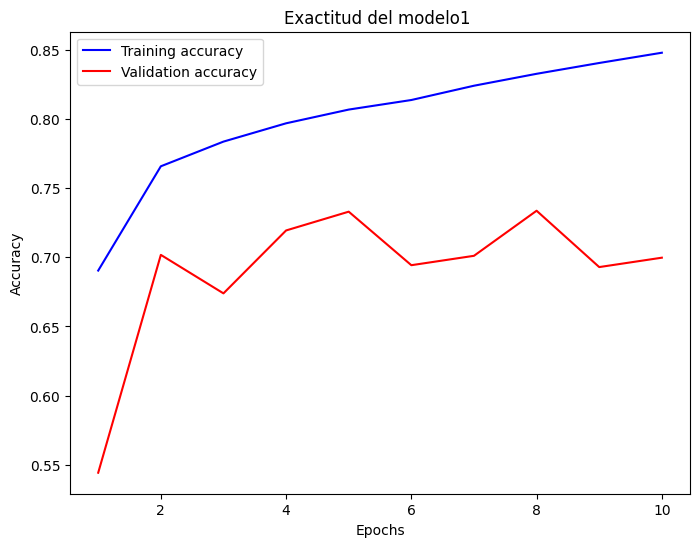

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, model1_acc, 'b', label='Training accuracy')
plt.plot(epochs, model1_val_acc, 'r', label='Validation accuracy')
plt.title('Exactitud del modelo1 ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

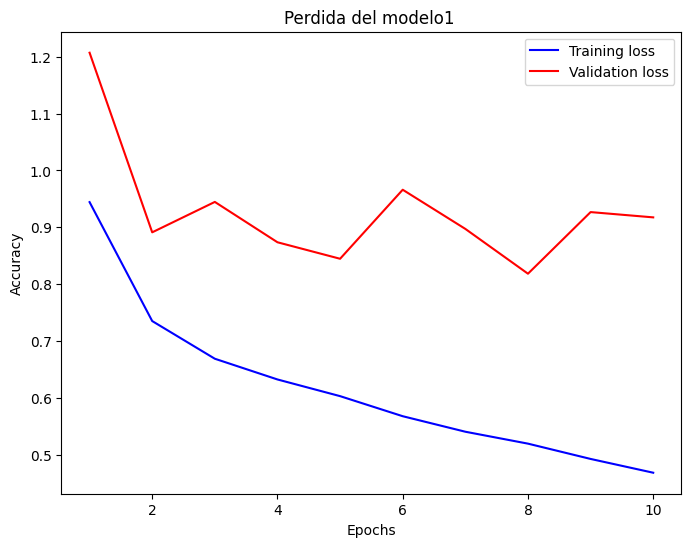

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, model1_loss, 'b', label='Training loss')
plt.plot(epochs, model1_val_loss, 'r', label='Validation loss')
plt.title('Perdida del modelo1 ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

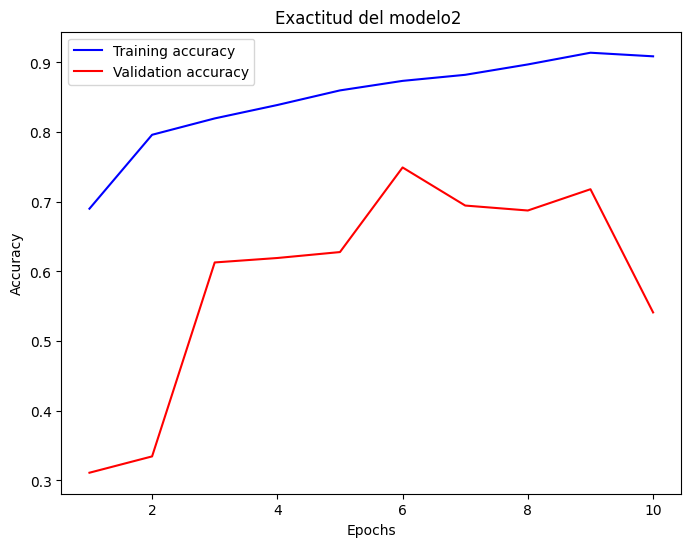

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, model2_acc, 'b', label='Training accuracy')
plt.plot(epochs, model2_val_acc, 'r', label='Validation accuracy')
plt.title('Exactitud del modelo2 ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

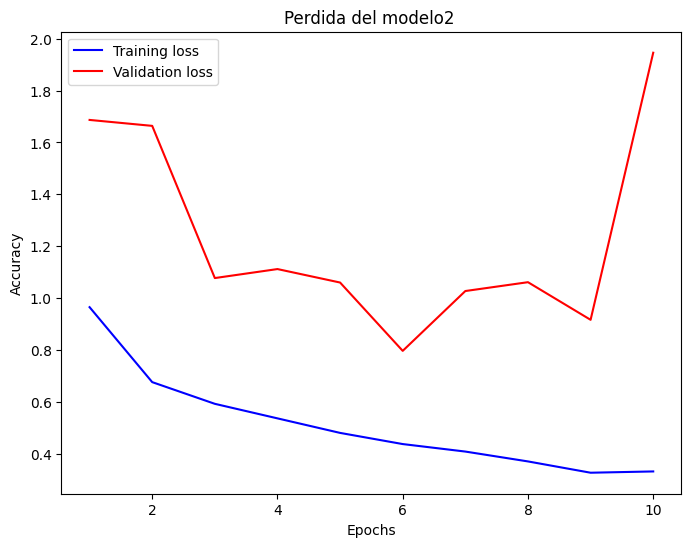

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, model2_loss, 'b', label='Training loss')
plt.plot(epochs, model2_val_loss, 'r', label='Validation loss')
plt.title('Perdida del modelo2 ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

CLASS_LABELS = ["Coast", "Desert", "Forest", "Glacier", "Mountain"]

def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(CLASS_LABELS))
    plt.xticks(tick_marks, CLASS_LABELS, rotation=45)
    plt.yticks(tick_marks, CLASS_LABELS)

    fmt = '.2f' if cm.dtype == np.float32 else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()

def evaluate_model(y_test, predicted_indices, dataset_name):
    y_true = y_test
    y_predicted = predicted_indices

    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_predicted)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    plot_confusion_matrix(cm)
    plt.show()

    clf_report = classification_report(y_true, y_predicted, target_names=CLASS_LABELS, output_dict=True)
    f1_scores = [v['f1-score'] for k, v in clf_report.items() if k in CLASS_LABELS]
    precision_scores = [v['precision'] for k, v in clf_report.items() if k in CLASS_LABELS]
    recall_scores = [v['recall'] for k, v in clf_report.items() if k in CLASS_LABELS]

    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].bar(CLASS_LABELS, f1_scores)
    axs[0].set_title(f"F1-score on {dataset_name}")
    axs[0].set_ylim((np.min(f1_scores) - 0.1), 1)

    axs[1].bar(CLASS_LABELS, precision_scores)
    axs[1].set_title(f"Precision on {dataset_name}")
    axs[1].set_ylim((np.min(precision_scores) - 0.1), 1)

    axs[2].bar(CLASS_LABELS, recall_scores)
    axs[2].set_title(f"Recall on {dataset_name}")
    axs[2].set_ylim((np.min(recall_scores) - 0.1), 1)
    plt.show()

    accuracy = clf_report['accuracy']
    print(f"Accuracy on {dataset_name}: {accuracy * 100:.2f}%")
    return accuracy

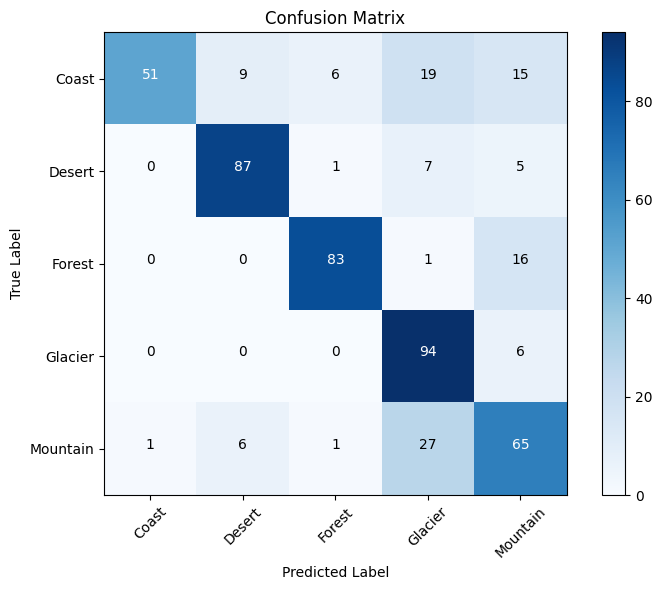

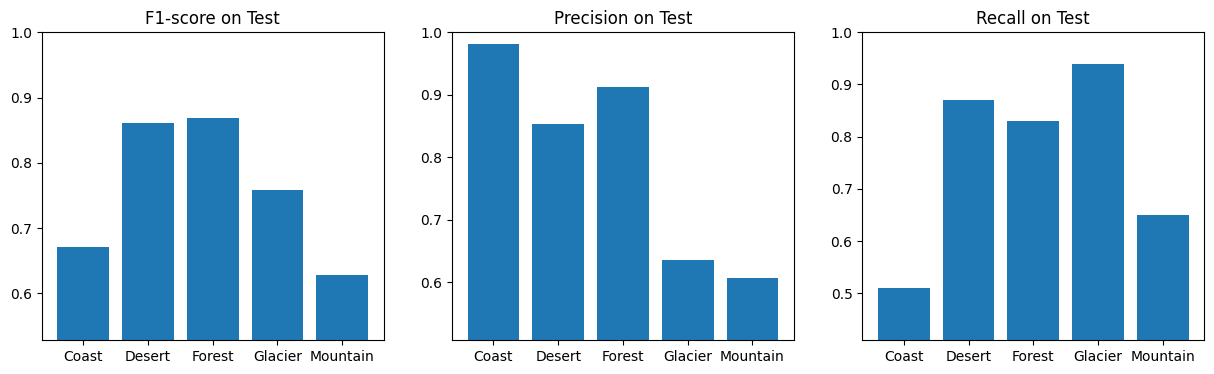

Accuracy on Test: 76.00%


0.76

In [ ]:
y_testmod=y_test-1
evaluate_model(y_testmod, predicted_indices, "Test")

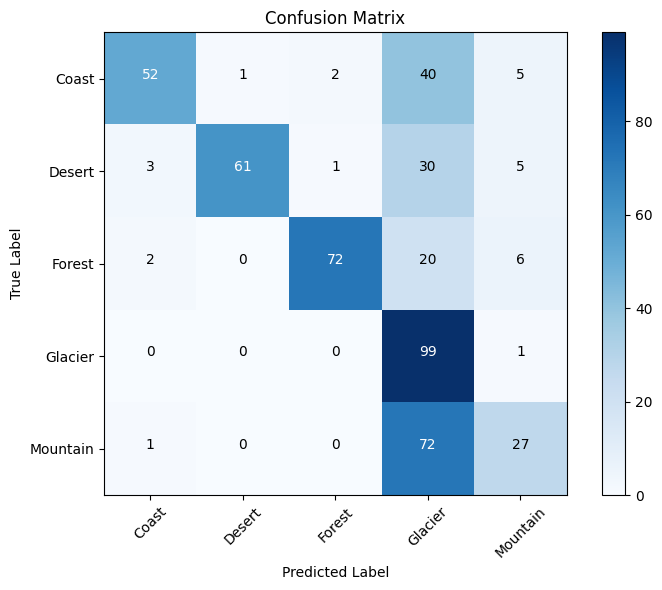

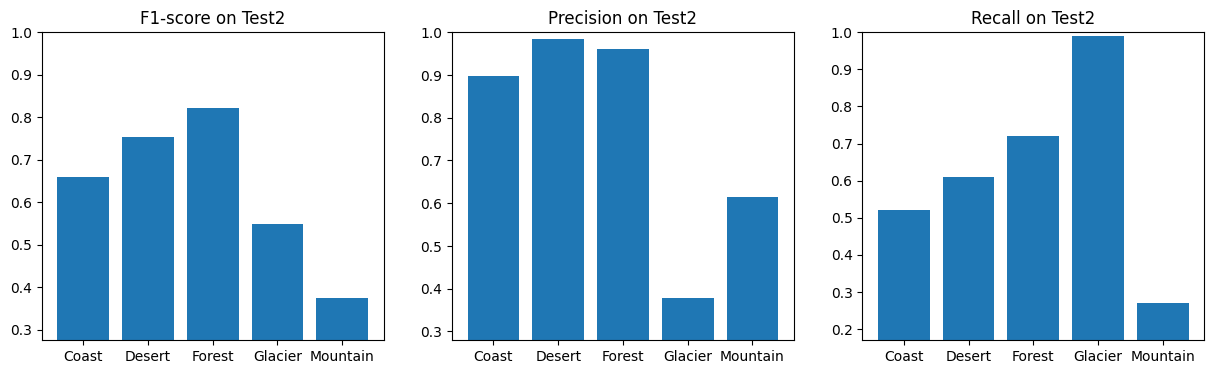

Accuracy on Test2: 62.20%


0.622

In [ ]:
evaluate_model(y_testmod, predicted_indicesb,'Test2')
